<a href="https://colab.research.google.com/github/luismiguelcasadodiaz/IBM_SkillsBuild_IA_325/blob/main/IA_325_py_ex_12.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Ejercicio 1 de KNN, 12 del curso
(KNN) K-Nearest Neighbors o lo K-vecinos más cercanos

[Conjunto de datos](https://www.kaggle.com/datasets/rajansharma780/vehicle)
846 vehículos con 19 características cada unow

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [18]:
%ls

sample_data/  vehiculos.csv


In [19]:
df = pd.read_csv('vehiculos.csv')

In [20]:
df.head()

compactness  circularity  distance_circularity  radius_ratio  \
0         95.0         48.0                  83.0         178.0   
1         91.0         41.0                  84.0         141.0   
2        104.0         50.0                 106.0         209.0   
3         93.0         41.0                  82.0         159.0   
4         85.0         44.0                  70.0         205.0   

   pr_axis_aspect_ratio  max_length_aspect_ratio  scatter_ratio  \
0                  72.0                     10.0          162.0   
1                  57.0                      9.0          149.0   
2                  66.0                     10.0          207.0   
3                  63.0                      9.0          144.0   
4                 103.0                     52.0          149.0   

   elongatedness  pr_axis_rectangularity  max_length_rectangularity  \
0           42.0                    20.0                      159.0   
1           45.0                    19.0                      143.0   
2           32.0                    23.0                      158.0   
3           46.0                    19.0                      143.0   
4           45.0                    19.0                      144.0   

   scaled_variance_major_axis  scaled_variance_minor_axis  \
0                       176.0                       379.0   
1                       170.0                       330.0   
2                       223.0                       635.0   
3                       160.0                       309.0   
4                       241.0                       325.0   

   scaled_radius_gyration  skewness_major_axis  skewness_minor_axis  \
0                   184.0                 70.0                  6.0   
1                   158.0                 72.0                  9.0   
2                   220.0                 73.0                 14.0   
3                   127.0                 63.0                  6.0   
4                   188.0                127.0                  9.0   

   kurtosis_minor_axis  kurtosis_major_axis  hollows_ratio vehicle_class  
0                 16.0                187.0          197.0           van  
1                 14.0                189.0          199.0           van  
2                  9.0                188.0          196.0          saab  
3                 10.0                199.0          207.0           van  
4                 11.0                180.0          183.0           bus

In [21]:
df.shape

(846, 19)

In [22]:
df.describe()

compactness  circularity  distance_circularity  radius_ratio  \
count   846.000000   846.000000            846.000000    846.000000   
mean     93.678487    44.861702             82.088652    168.940898   
std       8.234474     6.169866             15.771533     33.472183   
min      73.000000    33.000000             40.000000    104.000000   
25%      87.000000    40.000000             70.000000    141.000000   
50%      93.000000    44.000000             80.000000    167.000000   
75%     100.000000    49.000000             98.000000    195.000000   
max     119.000000    59.000000            112.000000    333.000000   

       pr_axis_aspect_ratio  max_length_aspect_ratio  scatter_ratio  \
count            846.000000               846.000000     846.000000   
mean              61.693853                 8.567376     168.839243   
std                7.888251                 4.601217      33.244978   
min               47.000000                 2.000000     112.000000   
25%               57.000000                 7.000000     146.250000   
50%               61.000000                 8.000000     157.000000   
75%               65.000000                10.000000     198.000000   
max              138.000000                55.000000     265.000000   

       elongatedness  pr_axis_rectangularity  max_length_rectangularity  \
count     846.000000              846.000000                 846.000000   
mean       40.933806               20.582742                 147.998818   
std         7.811560                2.592138                  14.515652   
min        26.000000               17.000000                 118.000000   
25%        33.000000               19.000000                 137.000000   
50%        43.000000               20.000000                 146.000000   
75%        46.000000               23.000000                 159.000000   
max        61.000000               29.000000                 188.000000   

       scaled_variance_major_axis  scaled_variance_minor_axis  \
count                  846.000000                  846.000000   
mean                   188.625296                  439.911348   
std                     31.394837                  176.692614   
min                    130.000000                  184.000000   
25%                    167.000000                  318.250000   
50%                    178.500000                  364.000000   
75%                    217.000000                  587.000000   
max                    320.000000                 1018.000000   

       scaled_radius_gyration  skewness_major_axis  skewness_minor_axis  \
count               846.00000           846.000000           846.000000   
mean                174.70331            72.462175             6.377069   
std                  32.54649             7.486974             4.918353   
min                 109.00000            59.000000             0.000000   
25%                 149.00000            67.000000             2.000000   
50%                 173.00000            71.500000             6.000000   
75%                 198.00000            75.000000             9.000000   
max                 268.00000           135.000000            22.000000   

       kurtosis_minor_axis  kurtosis_major_axis  hollows_ratio  
count           846.000000           846.000000     846.000000  
mean             12.599291           188.932624     195.632388  
std               8.931240             6.163949       7.438797  
min               0.000000           176.000000     181.000000  
25%               5.000000           184.000000     190.250000  
50%              11.000000           188.000000     197.000000  
75%              19.000000           193.000000     201.000000  
max              41.000000           206.000000     211.000000

In [23]:
df.isna().sum()

compactness                   0
circularity                   0
distance_circularity          0
radius_ratio                  0
pr_axis_aspect_ratio          0
max_length_aspect_ratio       0
scatter_ratio                 0
elongatedness                 0
pr_axis_rectangularity        0
max_length_rectangularity     0
scaled_variance_major_axis    0
scaled_variance_minor_axis    0
scaled_radius_gyration        0
skewness_major_axis           0
skewness_minor_axis           0
kurtosis_minor_axis           0
kurtosis_major_axis           0
hollows_ratio                 0
vehicle_class                 0
dtype: int64

In [24]:
df.dtypes

compactness                   float64
circularity                   float64
distance_circularity          float64
radius_ratio                  float64
pr_axis_aspect_ratio          float64
max_length_aspect_ratio       float64
scatter_ratio                 float64
elongatedness                 float64
pr_axis_rectangularity        float64
max_length_rectangularity     float64
scaled_variance_major_axis    float64
scaled_variance_minor_axis    float64
scaled_radius_gyration        float64
skewness_major_axis           float64
skewness_minor_axis           float64
kurtosis_minor_axis           float64
kurtosis_major_axis           float64
hollows_ratio                 float64
vehicle_class                  object
dtype: object

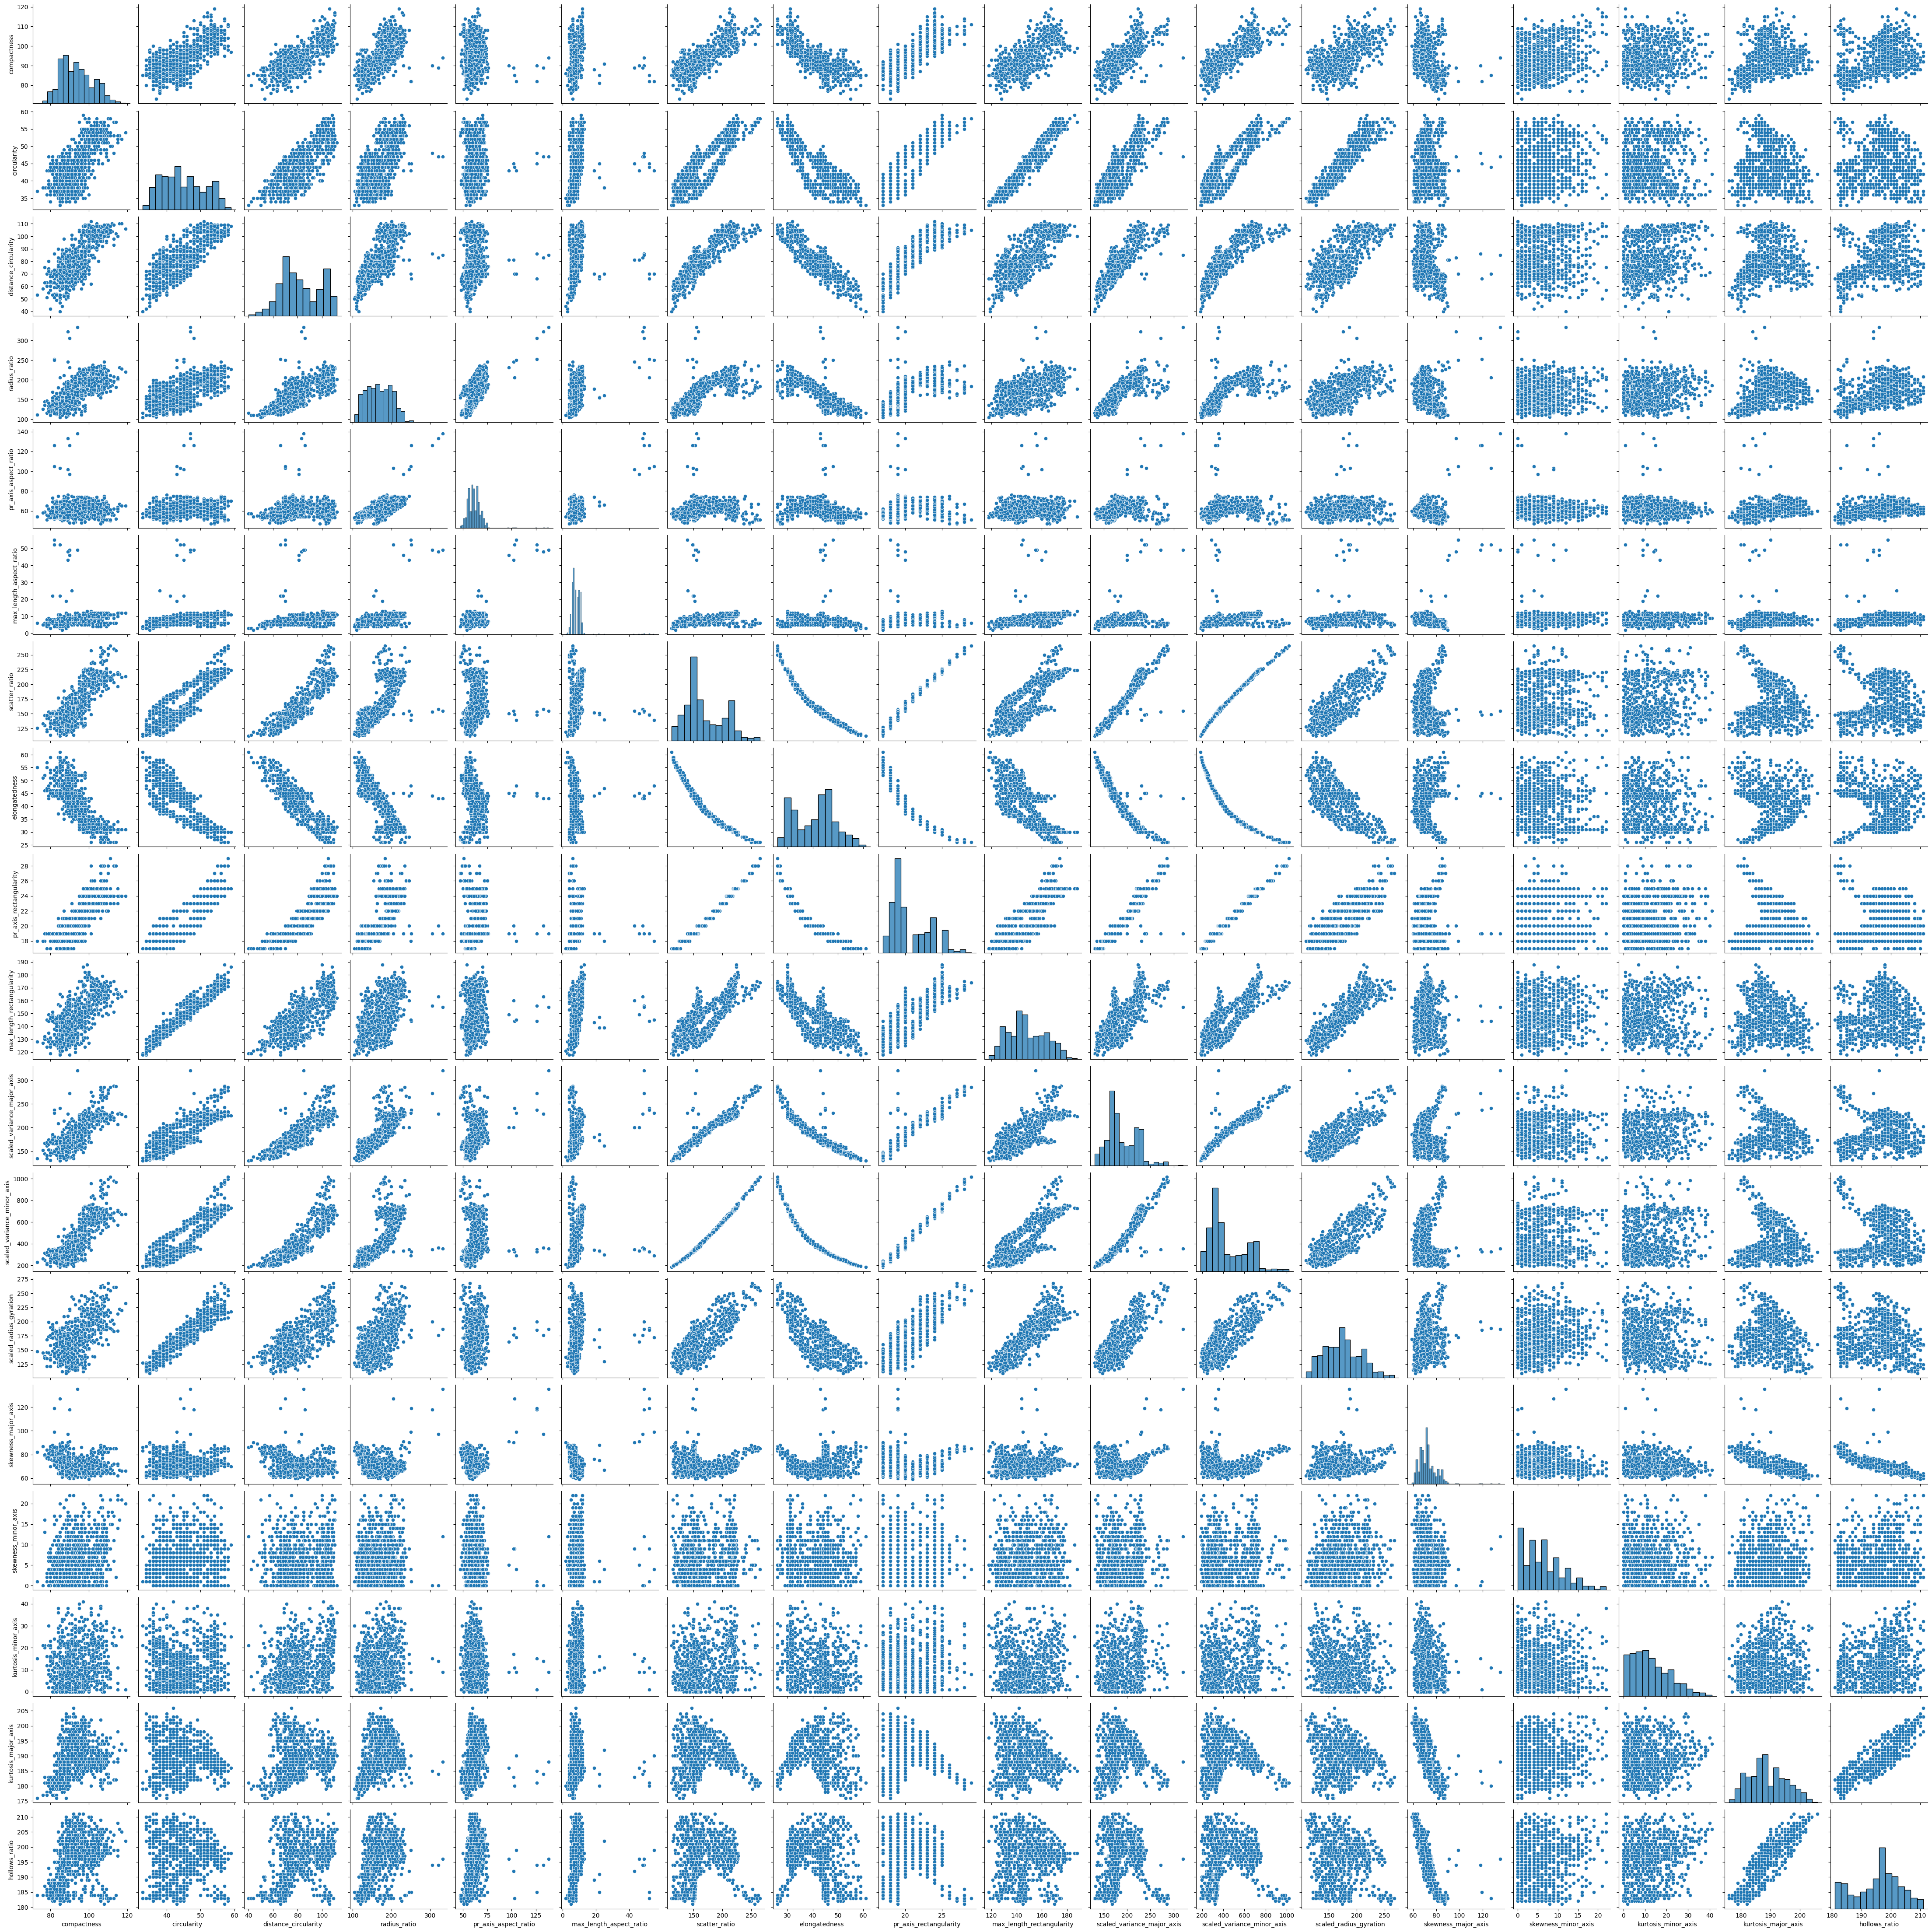

In [25]:
sns.pairplot(df)

In [26]:
columns = df.columns
columns[0:-1]

Index(['compactness', 'circularity', 'distance_circularity', 'radius_ratio',
       'pr_axis_aspect_ratio', 'max_length_aspect_ratio', 'scatter_ratio',
       'elongatedness', 'pr_axis_rectangularity', 'max_length_rectangularity',
       'scaled_variance_major_axis', 'scaled_variance_minor_axis',
       'scaled_radius_gyration', 'skewness_major_axis', 'skewness_minor_axis',
       'kurtosis_minor_axis', 'kurtosis_major_axis', 'hollows_ratio'],
      dtype='object')

<Axes: >

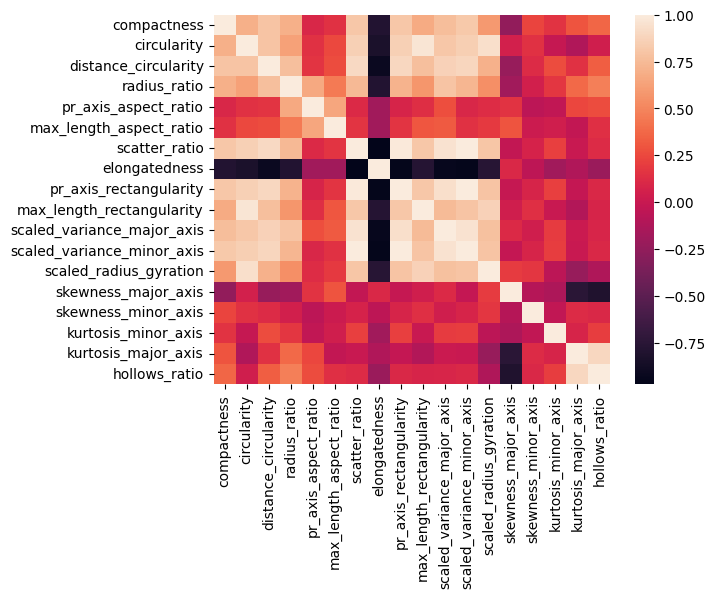

In [27]:

sns.heatmap(df[columns[0:-1]].corr(), annot=False)

###¿Cuantos tipos de vehículos hay?

In [28]:
df['vehicle_class'].unique()

array(['van', 'saab', 'bus', 'opel'], dtype=object)

## Separamos la variable dependiente 'vehicle_class' de las variables independientes, todas las otras.

La convención de usar una X mayúscula para la matriz de características y una y minúscula para la variable objetivo en aprendizaje automático es una práctica estándar ampliamente adoptada, particularmente dentro del ecosistema de ciencia de datos de Python (especialmente con bibliotecas como NumPy, pandas y scikit-learn).

Si bien no es una regla estricta impuesta por el lenguaje de programación en sí, esta convención ha surgido y persistido por varias razones:

1. Notación Matemática:

+ En álgebra lineal y estadística, que forman la base matemática de muchos algoritmos de aprendizaje automático, es común representar las matrices con letras mayúsculas (p. ej., X) y los vectores con letras minúsculas (p. ej., y o x).
+ La matriz de características X suele ser un array 2D (o un DataFrame de pandas, que puede considerarse una tabla), donde las filas representan muestras individuales (puntos de datos) y las columnas representan diferentes características. Esto se alinea con la representación matemática de una matriz.
+ La variable objetivo y suele ser un array 1D (o una Serie de pandas), que representa un único valor (la etiqueta de clase en clasificación o el valor continuo en regresión) para cada muestra. Esto se alinea con la representación matemática de un vector.
<br>
2. Consistencia y Legibilidad:

+ Adherirse a esta convención hace que el código sea más consistente y más fácil de entender para cualquier persona familiarizada con las prácticas de aprendizaje automático. Cuando alguien ve X_train e y_train, inmediatamente reconoce qué variable contiene las características de entrenamiento y cuál contiene los valores objetivo correspondientes.
+ Esta consistencia reduce la carga cognitiva al leer y escribir código de aprendizaje automático, especialmente en entornos de colaboración o al trabajar con código escrito por otros.

In [29]:
y = df['vehicle_class']
X = df.drop('vehicle_class', axis=1)


## Dividimos el data set entre los datos de entrenamiento (80%) y los de test (20%)

In [30]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Entrenamos el modelo con una K al azar (5 en este caso)

In [31]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

KNeighborsClassifier()

## Hacemos las predicciones

In [32]:
predicciones = knn.predict(X_test)
predicciones

array(['bus', 'van', 'bus', 'bus', 'bus', 'van', 'van', 'saab', 'bus',
       'opel', 'saab', 'bus', 'bus', 'opel', 'opel', 'saab', 'bus', 'bus',
       'opel', 'saab', 'van', 'van', 'opel', 'opel', 'opel', 'opel',
       'opel', 'van', 'van', 'van', 'saab', 'van', 'bus', 'van', 'bus',
       'bus', 'saab', 'saab', 'bus', 'opel', 'van', 'bus', 'opel', 'van',
       'saab', 'opel', 'bus', 'van', 'saab', 'van', 'bus', 'opel', 'van',
       'van', 'bus', 'saab', 'saab', 'opel', 'opel', 'bus', 'bus', 'van',
       'bus', 'saab', 'bus', 'bus', 'saab', 'saab', 'van', 'saab', 'van',
       'bus', 'saab', 'bus', 'van', 'van', 'saab', 'opel', 'opel', 'van',
       'bus', 'van', 'saab', 'saab', 'opel', 'saab', 'van', 'bus', 'van',
       'saab', 'saab', 'opel', 'bus', 'saab', 'saab', 'bus', 'van', 'van',
       'saab', 'opel', 'saab', 'opel', 'saab', 'van', 'bus', 'bus',
       'opel', 'van', 'saab', 'saab', 'van', 'bus', 'van', 'bus', 'bus',
       'van', 'bus', 'saab', 'bus', 'opel', 'bus', 's

## Evaluación del modelo

NOs paoyamos ne la matriz de confusion

In [50]:
from sklearn.metrics import confusion_matrix, classification_report
cm_k5 =confusion_matrix(y_test, predicciones)
cm_k5

array([[42,  2,  7,  1],
       [ 2, 12, 13,  3],
       [ 6, 21, 19,  2],
       [ 2,  0,  1, 37]])

### Nos fijamos en la precision

In [51]:
cr_k5=classification_report(y_test, predicciones)
print(cr_k5)

              precision    recall  f1-score   support

         bus       0.81      0.81      0.81        52
        opel       0.34      0.40      0.37        30
        saab       0.47      0.40      0.43        48
         van       0.86      0.93      0.89        40

    accuracy                           0.65       170
   macro avg       0.62      0.63      0.63       170
weighted avg       0.64      0.65      0.64       170



### elección del k más adecuado.

Nuestro modelo con k = 3 predice un una  precision del 81%.

Vamos a repetir este modelo para varios K y elegiremos el modelo con menor tasa de error.


In [36]:
tasas_error = []
tasas_error.append(0)
for i in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    predicciones_i = knn.predict(X_test)
    tasas_error.append(np.mean(y_test !=  predicciones_i))

+ **y_test != predicciones_i**:Esta parte compara cada elemento de la serie y_test (las etiquetas reales de los datos de prueba) con el elemento correspondiente de la serie predicciones_i (las etiquetas predichas por el modelo KNN con el número de vecinos i). El resultado de esta comparación es un array booleano (un array de True y False). Donde True indica que la predicción fue incorrecta (la etiqueta real es diferente de la predicha) y False indica que la predicción fue correcta (la etiqueta real es igual a la predicha).

+ **np.mean(...)** : La función np.mean() de la librería NumPy calcula la media de los elementos dentro del array booleano generado en el paso anterior. En NumPy, cuando se calcula la media de un array booleano, True se considera como 1 y False como 0. Por lo tanto, la media de este array booleano es equivalente a la suma de todos los True dividida por el número total de elementos. Esto, en esencia, te da la **proporción de predicciones incorrectas**.

En resumen:

np.mean(y_test != predicciones_i) calcula la proporción de veces que el modelo KNN (entrenado con i vecinos) predijo incorrectamente la clase del vehículo en el conjunto de datos de prueba (X_test). Este valor representa la tasa de error para ese valor específico de k (el número de vecinos).


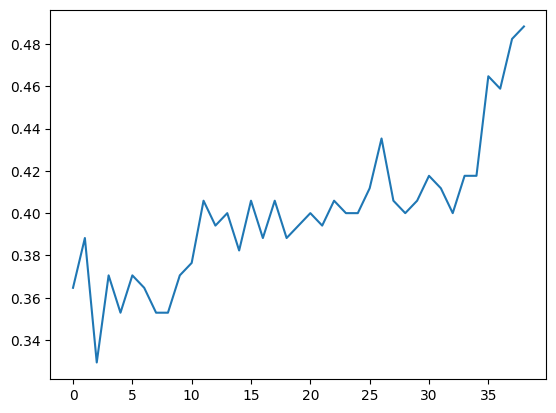

In [43]:
plt.plot(tasas_error[1:])

In [41]:
error_minimo = min(tasas_error[1:])
index_minimo = tasas_error.index(error_minimo)
print(f"K={index_minimo} es el que proporciona el menor error de prediccion, {error_minimo:4.2f}%")

K=3 es el que proporciona el menor error de prediccion, 0.33%


In [42]:
tasas_error


[0,
 np.float64(0.36470588235294116),
 np.float64(0.38823529411764707),
 np.float64(0.32941176470588235),
 np.float64(0.37058823529411766),
 np.float64(0.35294117647058826),
 np.float64(0.37058823529411766),
 np.float64(0.36470588235294116),
 np.float64(0.35294117647058826),
 np.float64(0.35294117647058826),
 np.float64(0.37058823529411766),
 np.float64(0.3764705882352941),
 np.float64(0.40588235294117647),
 np.float64(0.3941176470588235),
 np.float64(0.4),
 np.float64(0.38235294117647056),
 np.float64(0.40588235294117647),
 np.float64(0.38823529411764707),
 np.float64(0.40588235294117647),
 np.float64(0.38823529411764707),
 np.float64(0.3941176470588235),
 np.float64(0.4),
 np.float64(0.3941176470588235),
 np.float64(0.40588235294117647),
 np.float64(0.4),
 np.float64(0.4),
 np.float64(0.4117647058823529),
 np.float64(0.43529411764705883),
 np.float64(0.40588235294117647),
 np.float64(0.4),
 np.float64(0.40588235294117647),
 np.float64(0.4176470588235294),
 np.float64(0.41176470588235

## Entrenamos nuevamente con el K optimizado

In [54]:
knn = KNeighborsClassifier(n_neighbors=index_minimo)
knn.fit(X_train, y_train)
predicciones_i = knn.predict(X_test)

#

In [55]:
cm_k3 =confusion_matrix(y_test, predicciones_i)
print("Matriz de confusion para K=3\n",cm_k3)
print("Matriz de confusion para K=5\n",cm_k5)

Matriz de confusion para K=3
 [[41  3  6  2]
 [ 2 14 12  2]
 [ 5 21 21  1]
 [ 1  1  0 38]]
Matriz de confusion para K=5
 [[42  2  7  1]
 [ 2 12 13  3]
 [ 6 21 19  2]
 [ 2  0  1 37]]


In [56]:
cr_k3=classification_report(y_test, predicciones_i)
print("Informe de clasificación K=3\n", cr_k3)
print("Informe de clasificación K=5\n", cr_k5)

Informe de clasificación K=3
               precision    recall  f1-score   support

         bus       0.84      0.79      0.81        52
        opel       0.36      0.47      0.41        30
        saab       0.54      0.44      0.48        48
         van       0.88      0.95      0.92        40

    accuracy                           0.67       170
   macro avg       0.65      0.66      0.65       170
weighted avg       0.68      0.67      0.67       170

Informe de clasificación K=5
               precision    recall  f1-score   support

         bus       0.81      0.81      0.81        52
        opel       0.34      0.40      0.37        30
        saab       0.47      0.40      0.43        48
         van       0.86      0.93      0.89        40

    accuracy                           0.65       170
   macro avg       0.62      0.63      0.63       170
weighted avg       0.64      0.65      0.64       170

